# Integrating PySulfSat with PyMELTScalc
- This notebook can perform MELTS calculations, and then go onto calculate the SCSS and SCAS within a single notebook!
- It relies on the python MELTS architecture developed by Paula Antoshechkin at Caltech, and fractional crystallization functions written by Matthew Gleeson at UC Berkeley
- In addition to installing PySulfSat you will need to first download the MELTS python infrastructure from this website (https://magmasource.caltech.edu/gitlist/MELTS_Matlab.git/), and then the PyMELTScalc code by uncommenting below
- More information can be found here: https://github.com/gleesonm1/pyMELTScalc
You can download the excel spreadsheet with the compositions here:
- https://github.com/PennyWieser/PySulfSat/blob/main/docs/Examples/Integrating_with_PyMELTS/Glass_input_example.xlsx

## If you havent done so already, you need to pip install PySulfSat
- Do this by removing the #. You only need to do this once per computer. After your initial installation, you will want to upgrade instead using the second command


In [1]:
#!pip install PySulfSat
#!pip install PySulfSat --upgrade

## Now you need to append the path to your local MELTS installation

In [1]:
import sys
sys.path.append(r'G:\My Drive\Berkeley_NEW\MELTS_python_Paula\melts_matlab_git_master\package')

## And now you need to download the PyMELTScalc code by uncommenting this line

In [2]:
#!pip install --upgrade "https://github.com/gleesonm1/pyMELTScalc/archive/refs/tags/v0.0.7.zip"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
import pyMELTScalc as M

In [6]:
### Use these version numbers when communicating problems to Penny (ss) and Matt (M.)

In [7]:
ss.__version__

'0.0.9'

In [8]:
M.__version__

'0.0.11'

## Import data
- Here, we load in some glass EPMA data, and then start a MELTS model from the first row in the loaded spreadsheet

In [9]:
df_out2=ss.import_data('Glass_input_example.xlsx', sheet_name='Glass_input', 
                       suffix="_Liq", sample_label='Sample_ID_Liq')
df_out2.head()
# Selecting a single composition to start the model from
sample=df_out2.iloc[0]

We have replaced all missing liquid oxides and strings with zeros. 


## Using PyMELTScalc
- Here we initiate a melts fractional crystallizatoin model, see the documentation for that package for more information

In [10]:
P=1000
MELTS_FC=M.multi_path(Model = "MELTSv1.0.2", 
                        Fe3Fet_Liq=0.1,
                          H2O_Liq=0.1,
                        comp = sample.to_dict(), 
                        Frac_solid = True, 
                        Frac_fluid = True, 
                        find_liquidus = True,
                        T_end_C = 750, 
                        dt_C = 5, 
                        P_bar = P, 
                        )

Running MELTSv1.0.2 calculation... Complete (time taken = 15.1 seconds)

### Inspecting the outputs from this function

In [11]:
MELTS=MELTS_FC['All']
MELTS.head()

,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,Fe2O3_Liq,...,Na2O_whitlockite1,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1,mass_whitlockite1,v_whitlockite1,rho_whitlockite1
0,1179.700000,1000.0,-1.180676e+06,264.191326,36.590693,50.386348,2.038376,13.121548,0.0,1.468823,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1174.703488,1000.0,-1.182433e+06,262.979871,36.447230,50.364941,2.079988,13.353934,0.0,1.472726,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1169.706977,1000.0,-1.152172e+06,255.125955,35.446411,50.329120,2.182600,13.201932,0.0,1.514798,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1164.710465,1000.0,-1.085714e+06,241.004085,33.492630,50.283802,2.287899,13.046274,0.0,1.559499,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1159.713953,1000.0,-1.024687e+06,228.008024,31.693729,50.227928,2.397205,12.884931,0.0,1.607389,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Lets see what phases it crystallized..

In [12]:
# Lets see what phases we have!
MELTS.columns[MELTS.columns.str.contains('SiO2')]

Index(['SiO2_Liq', 'SiO2_Cpx', 'SiO2_Plag', 'SiO2_Cpx2', 'SiO2_rutile1',
       'SiO2_Sp', 'SiO2_Ol', 'SiO2_whitlockite1'],
      dtype='object')

## Calculate SCSS using Li and Zhang 2022

In [13]:
LiZhang22=ss.calculate_LiZhang2022_SCSS(df=MELTS, T_K=MELTS['T_C']+273.15, 
P_kbar=P/1000, 
H2O_Liq=MELTS['H2O_Liq'], Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS['Fe3Fet_Liq'])
LiZhang22.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
replacing Fe3Fet_Liq in the original dataframe with that input into the function


,SCSS_Tot,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,...,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,1104.020071,1179.700000,1000.0,-1.180676e+06,264.191326,36.590693,50.386348,2.038376,13.121548,0.0,...,0.146193,0.094161,0.002000,0.092647,0.114037,0.045247,0.002953,0.001500,0.0,0.010448
1,1075.573818,1174.703488,1000.0,-1.182433e+06,262.979871,36.447230,50.364941,2.079988,13.353934,0.0,...,0.148888,0.095228,0.002055,0.089173,0.111965,0.046377,0.003034,0.001541,0.0,0.010484
2,1090.293779,1169.706977,1000.0,-1.152172e+06,255.125955,35.446411,50.329120,2.182600,13.201932,0.0,...,0.147465,0.098863,0.002176,0.087043,0.108845,0.047420,0.003201,0.001631,0.0,0.010803
3,1105.968568,1164.710465,1000.0,-1.085714e+06,241.004085,33.492630,50.283802,2.287899,13.046274,0.0,...,0.146002,0.102486,0.002300,0.084862,0.105895,0.048407,0.003372,0.001724,0.0,0.011143
4,1122.827173,1159.713953,1000.0,-1.024687e+06,228.008024,31.693729,50.227928,2.397205,12.884931,0.0,...,0.144479,0.106107,0.002430,0.082594,0.103140,0.049345,0.003548,0.001821,0.0,0.011508


## Smythe sulfide saturation model

In [14]:
Smythe_CalcSulf=ss.calculate_S2017_SCSS(df=MELTS, 
T_K=MELTS['T_C']+273.15, 
P_kbar=P/1000, Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=MELTS['Fe3Fet_Liq'])

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


,SCSS2_ppm_ideal_Smythe2017,SCSS2_ppm_ideal_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,...,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1,mass_whitlockite1,v_whitlockite1,rho_whitlockite1,Fe_FeNiCu_Sulf_calc
0,1418.668555,387.537370,1452.850000,1.0,0.65,0.099881,0.473365,0.014401,0.145286,0.092073,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
1,1403.504696,383.395062,1447.853488,1.0,0.65,0.099173,0.473420,0.014703,0.147939,0.088606,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
2,1454.308254,397.273059,1442.856977,1.0,0.65,0.098508,0.473777,0.015451,0.146469,0.086457,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
3,1511.396189,412.867757,1437.860465,1.0,0.65,0.098064,0.474064,0.016221,0.144961,0.084258,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
4,1575.717392,430.438366,1432.863953,1.0,0.65,0.097842,0.474277,0.017022,0.143392,0.081973,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65


Text(0, 0.5, 'SCSS (Smythe, ppm)')

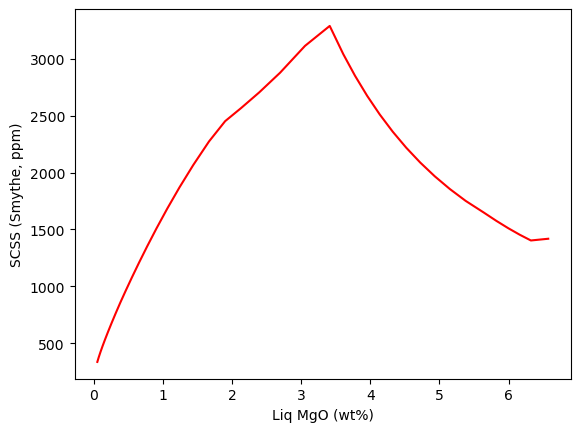

In [15]:
plt.plot(MELTS['MgO_Liq'], Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('SCSS (Smythe, ppm)')

Text(0, 0.5, 'Liq FeO (wt%)')

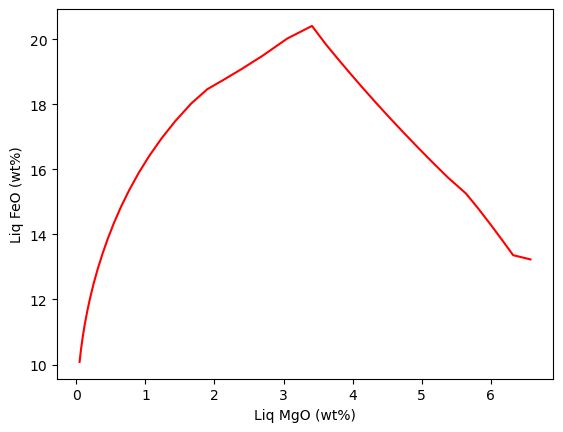

In [16]:
plt.plot( MELTS['MgO_Liq'],MELTS['FeOt_Liq'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('Liq FeO (wt%)')

## Using Oneill

In [17]:
ONeill_MeasSulf=ss.calculate_O2021_SCSS(df=MELTS, T_K=MELTS['T_C']+273.15, 
P_kbar=P/1000,
Fe_FeNiCu_Sulf=0.66,
Fe3Fet_Liq=MELTS['Fe3Fet_Liq'])
ONeill_MeasSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,T_C,P_bar,h,s,...,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1,mass_whitlockite1,v_whitlockite1,rho_whitlockite1,Fe_FeNiCu_Sulf_calc
0,1369.766307,7.222395,-2.088187,-0.514565,7.809078,-2.160304,1179.700000,1000.0,-1.180676e+06,264.191326,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
1,1343.739977,7.203212,-2.073514,-0.515750,7.844952,-2.199505,1174.703488,1000.0,-1.182433e+06,262.979871,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
2,1370.823441,7.223167,-2.043557,-0.519793,7.881088,-2.181685,1169.706977,1000.0,-1.152172e+06,255.125955,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
3,1399.689842,7.244006,-2.015081,-0.523839,7.917487,-2.164723,1164.710465,1000.0,-1.085714e+06,241.004085,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
4,1430.724990,7.265937,-1.987882,-0.527901,7.954152,-2.148196,1159.713953,1000.0,-1.024687e+06,228.008024,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
